# Click Models

### Load libraries

In [1]:
import pandas as pd
%matplotlib inline
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib import style, rc, font_manager
# style.use('dark_background')
# style.use('seaborn-darkgrid')
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# font 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import random
import ast
import json
import numpy as np
from scipy.stats import skew
from plotnine import *
from plotnine import data

### Load Data

In [2]:
service, period, version = "card", "1m", "v3"
service, period, version = "card", "1w", "v3"

def _unk_to_nan(x):
    if x == "UNK":
        return np.nan
    return x

df = pd.read_csv(f"./{service}.click.ranking.base.{period}.{version}.features.csv")
# df["rank"] = df["rank"].apply(_unk_to_nan)
# 랭크 정보가 없는 문서 제거하기
# df = df.loc[~df["rank"].isnull(), :]
# 이상한 로그 제거하기
abnormal_idx_list = df.loc[(df["impressions"] == 0) & (df["clicks"] > 0)].index
print("imp=0, click>0 인 이상한 경우:", len(abnormal_idx_list))
df.drop(abnormal_idx_list, axis=0, inplace=True)
# rank datatype 변경
# df["rank"] = pd.to_numeric(df["rank"])
# df = df.astype({"rank": int})
# df.insert(1, "rank", df.pop("rank"))
# df = df.sort_values(["search_keyword", "rank"])
print(f"data length: {len(df)}")
df


imp=0, click>0 인 이상한 경우: 0
data length: 7772


,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,...,f__reply_count,f__follower_count,f__praise_count,f__scrap_count,f__view_count,f__user_card_count,f__created_at_score,f__has_tag,f__is_project,f__desc.prod.keyword
0,#거실인테리어,12472865,19.5,39.89,11,1,7,1,0,40,...,0.000000,0.409843,0.194536,0.469929,0.560067,0.443496,1.0,1.0,1.0,2.588398
1,#거실인테리어,13478166,150.0,0.00,1,0,1,0,0,40,...,0.000000,0.675424,0.238558,0.000000,0.000000,0.537327,1.1,0.0,0.0,0.000000
2,#거실인테리어,12516062,102.0,0.00,1,0,1,0,0,40,...,0.000000,0.559592,0.211272,0.139980,0.000000,0.565214,1.0,1.0,0.0,3.398164
3,#거실인테리어,13914011,181.0,0.00,1,0,1,0,0,40,...,0.000000,0.311260,0.000000,0.000000,0.213126,0.472722,1.1,1.0,0.0,0.000000
4,#거실인테리어,9699172,209.0,0.00,1,0,1,0,0,40,...,0.000000,0.675969,0.225770,0.196486,0.488322,0.528096,1.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,#침실인테리어,15092594,118.0,103.00,2,0,2,0,0,214,...,0.000000,0.572902,0.249997,0.069990,0.566497,0.548230,1.2,0.0,0.0,0.000000
7768,#침실인테리어,15197686,20.0,0.00,2,0,1,0,0,214,...,0.000000,0.155630,0.000000,0.000000,0.250858,0.339794,1.2,1.0,0.0,0.000000
7769,#침실인테리어,15645055,54.0,0.00,1,0,1,0,0,214,...,0.000000,0.572902,0.340428,0.221863,0.000000,0.548230,1.2,0.0,0.0,0.000000
7770,#침실인테리어,15783070,323.0,0.00,3,0,1,0,0,214,...,0.111499,0.303703,0.000000,0.180921,0.408118,0.385883,1.2,1.0,1.0,0.000000


질의별 문서 수

In [3]:
data_len = []
missing_list = []
for query, group_df in df.groupby(["search_keyword"]):
    data_len.append(len(group_df))

random.shuffle(data_len)
draw_dist(data_len[:300])


NameError: name 'draw_dist' is not defined

In [ ]:
df.dtypes

search_keyword               object
docid                         int64
avgRank                     float64
stdevRank                   float64
impressions                   int64
clicks                        int64
uimpressions                  int64
uclicks                       int64
scrapCnt                      int64
qc                            int64
cc                            int64
uqc                           int64
ucc                           int64
f__description.bm25         float64
f__keyword_list.bm25        float64
f__nickname.bm25            float64
f__company.bm25             float64
f__prod_name.bm25           float64
f__prod_brand_name.bm25     float64
f__prod_categories.bm25     float64
f__decode_style.bm25        float64
f__decode_area.bm25         float64
f__decode_residence.bm25    float64
f__reinforcement.bm25       float64
f__click_keywords.bm25      float64
f__negatives.bm25           float64
f__reply_count              float64
f__follower_count           

In [ ]:
print("Number of Queries: ", len(df["search_keyword"].unique()))
print(df.columns)
df.describe()

Number of Queries:  11
Index(['search_keyword', 'docid', 'avgRank', 'stdevRank', 'impressions',
       'clicks', 'uimpressions', 'uclicks', 'scrapCnt', 'qc', 'cc', 'uqc',
       'ucc', 'f__description.bm25', 'f__keyword_list.bm25',
       'f__nickname.bm25', 'f__company.bm25', 'f__prod_name.bm25',
       'f__prod_brand_name.bm25', 'f__prod_categories.bm25',
       'f__decode_style.bm25', 'f__decode_area.bm25',
       'f__decode_residence.bm25', 'f__reinforcement.bm25',
       'f__click_keywords.bm25', 'f__negatives.bm25', 'f__reply_count',
       'f__follower_count', 'f__praise_count', 'f__scrap_count',
       'f__view_count', 'f__user_card_count', 'f__created_at_score',
       'f__has_tag', 'f__is_project', 'f__desc.prod.keyword'],
      dtype='object')


,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,cc,...,f__reply_count,f__follower_count,f__praise_count,f__scrap_count,f__view_count,f__user_card_count,f__created_at_score,f__has_tag,f__is_project,f__desc.prod.keyword
count,7.772000e+03,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,...,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,1.111161e+07,322.501783,10.461091,4.773160,0.130983,3.136773,0.123006,0.001158,161.003860,134.403500,...,0.032318,0.438085,0.190152,0.204327,0.373152,0.440834,1.016791,0.772131,0.144107,1.078561
std,4.576184e+06,419.302702,32.055976,9.461182,0.534567,5.148116,0.495041,0.034012,118.503105,104.472959,...,0.089919,0.225870,0.140073,0.187782,0.213025,0.134308,0.204347,0.419485,0.351221,1.658464
min,1.089000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,36.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060206,0.600000,0.000000,0.000000,0.000000
25%,8.704979e+06,62.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,59.000000,48.000000,...,0.000000,0.341514,0.075257,0.000000,0.286001,0.362582,0.800000,1.000000,0.000000,0.000000
50%,1.252675e+07,157.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,134.000000,90.000000,...,0.000000,0.467691,0.174741,0.162511,0.411145,0.470049,1.000000,1.000000,0.000000,0.000000
75%,1.463338e+07,390.000000,4.375000,4.000000,0.000000,3.000000,0.000000,0.000000,214.000000,158.000000,...,0.000000,0.611380,0.269792,0.332794,0.518600,0.542571,1.200000,1.000000,0.000000,2.447341
max,1.666516e+07,2061.000000,612.500000,150.000000,11.000000,56.000000,10.000000,1.000000,409.000000,353.000000,...,0.740785,0.867786,0.906729,0.881377,0.901484,0.765098,1.300000,1.000000,1.000000,8.384111


In [ ]:
# num_numeric_cols = len(df.select_dtypes(include=np.number).columns.tolist())
# num_cols = 2
# num_rows = math.ceil(num_numeric_cols / num_cols)
# df.boxplot(column=["impressions", "clicks", "uimpressions", "uclicks", "scrapCnt"])

### Adjust CTR

In [25]:
from click_models import CTRHelper
# regularize CTR globally
# ctr_helper = CTRHelper(df=df, impression_column="impressions", click_column="clicks")
# NOTE: impressions가 너무 왜곡이 많이 되어 있다. (뒤로가기, 새로고침 등) 특히 클릭이 발생한 주변 문서들에 대해서도!
ctr_helper = CTRHelper(df=df, impression_column="uimpressions", click_column="uclicks")
df = ctr_helper.regularize()
df

,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,...,f__scrap_count,f__view_count,f__user_card_count,f__created_at_score,f__has_tag,f__is_project,f__desc.prod.keyword,ctr_raw,ctr_beta,ctr_gaussian
0,#거실인테리어,12472865,19.50,39.89,11,1,7,1,0,40,...,0.469929,0.560067,0.443496,1.0,1.0,1.0,2.588398,0.142857,0.164485,-0.59676
188,#거실인테리어,13599333,23.50,0.50,2,0,2,0,0,40,...,0.139980,0.395485,0.527297,1.1,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
189,#거실인테리어,15114364,94.00,4.00,2,0,2,0,0,40,...,0.379783,0.616219,0.491878,1.2,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
190,#거실인테리어,10207244,28.00,2.00,2,0,2,0,0,40,...,0.000000,0.506503,0.521705,1.0,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
191,#거실인테리어,12610216,12.00,0.00,3,0,2,0,0,40,...,0.258993,0.492935,0.589388,1.1,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7219,#침실인테리어,5409746,202.00,0.00,3,0,1,0,0,214,...,0.110931,0.614781,0.446089,0.8,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
7218,#침실인테리어,11043744,82.00,0.00,1,0,1,0,0,214,...,0.404637,0.587269,0.504227,1.0,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
7217,#침실인테리어,11043743,116.00,0.00,1,0,1,0,0,214,...,0.242125,0.587269,0.504227,1.0,1.0,0.0,0.000000,0.000000,0.000000,-0.99554
7354,#침실인테리어,13980664,270.67,2.75,6,0,4,0,0,214,...,0.180921,0.313469,0.431067,1.1,1.0,1.0,2.229826,0.000000,0.000000,-0.99554


/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeW

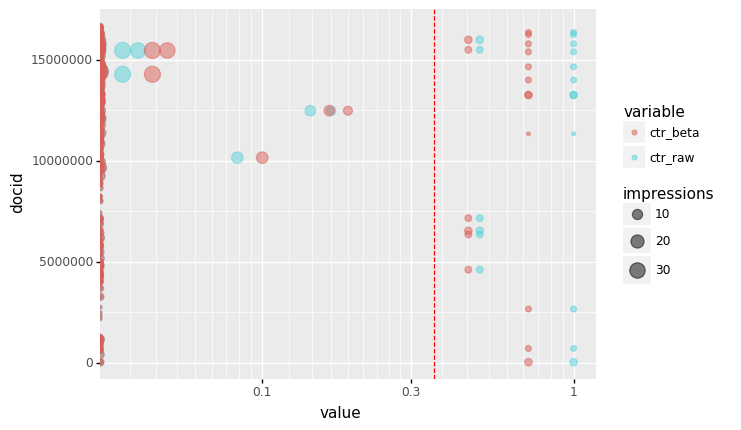

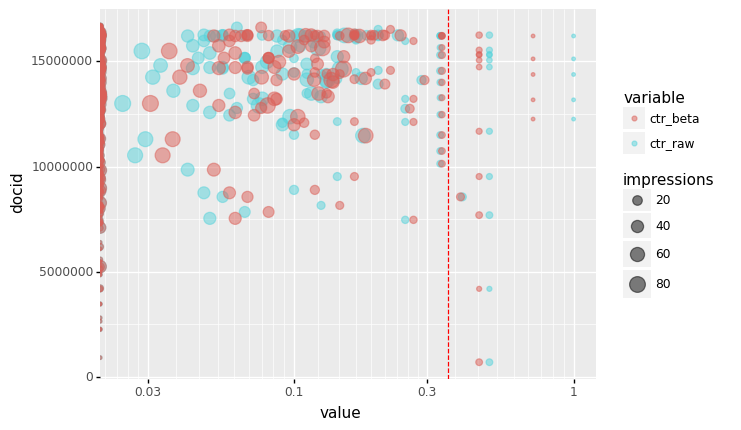

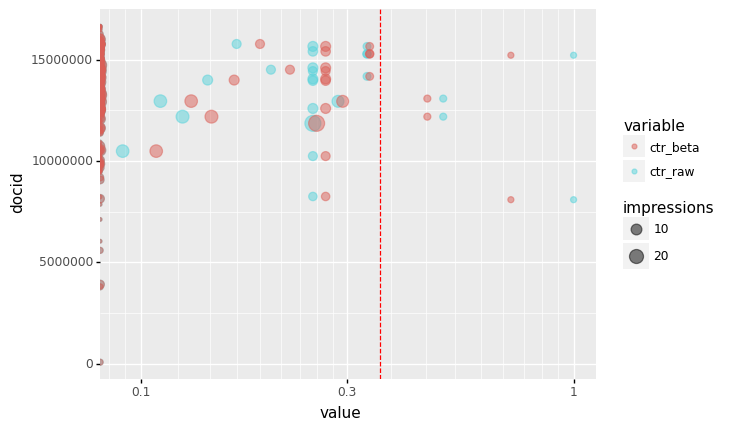

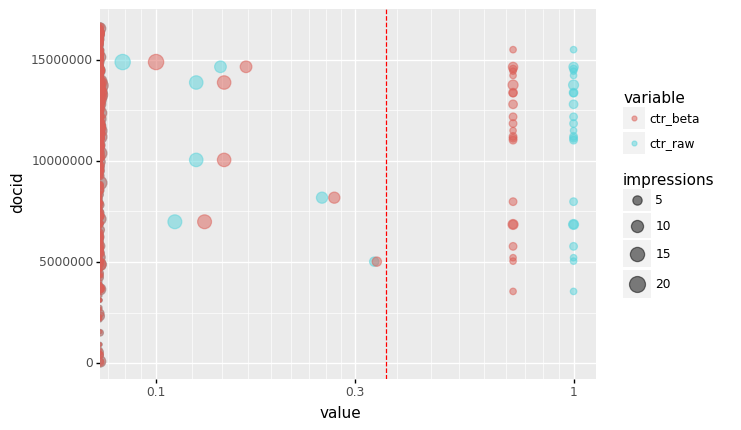

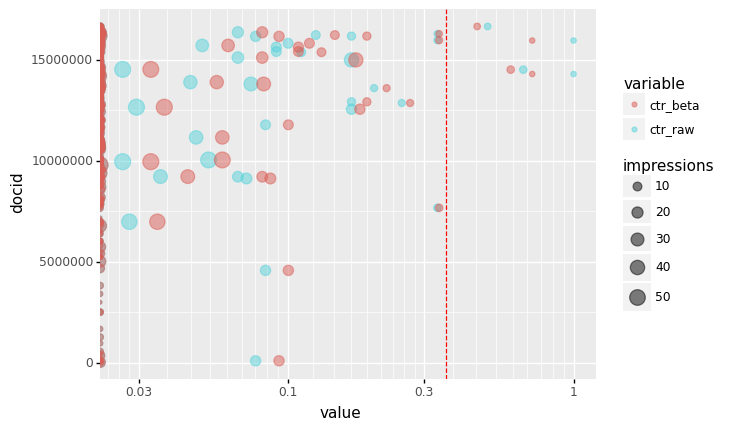

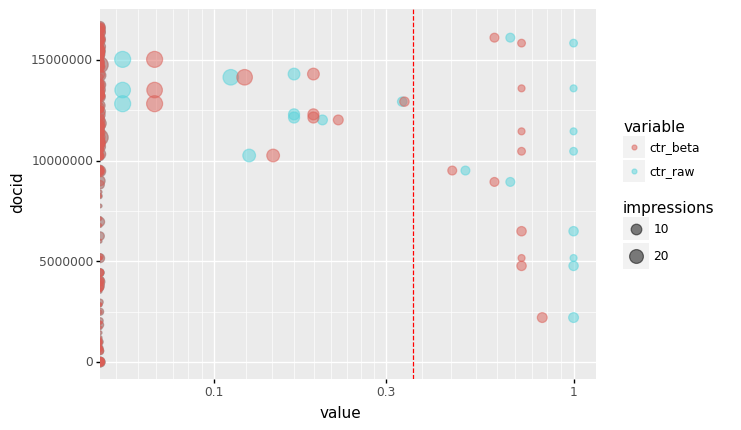

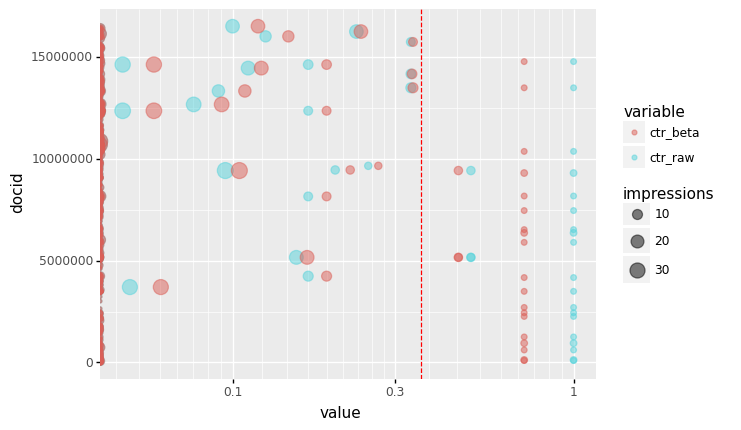

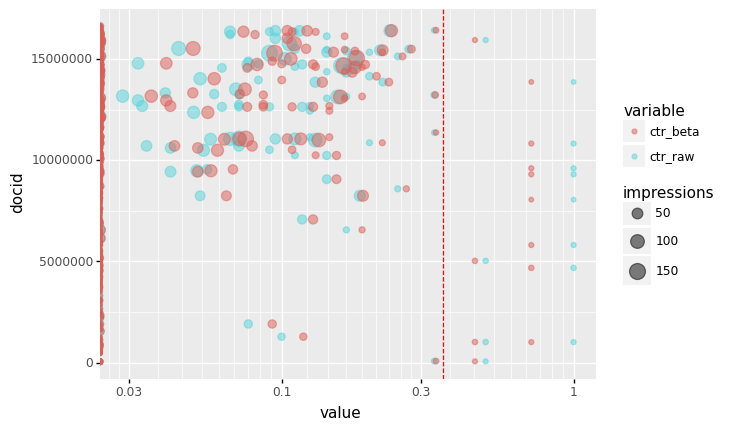

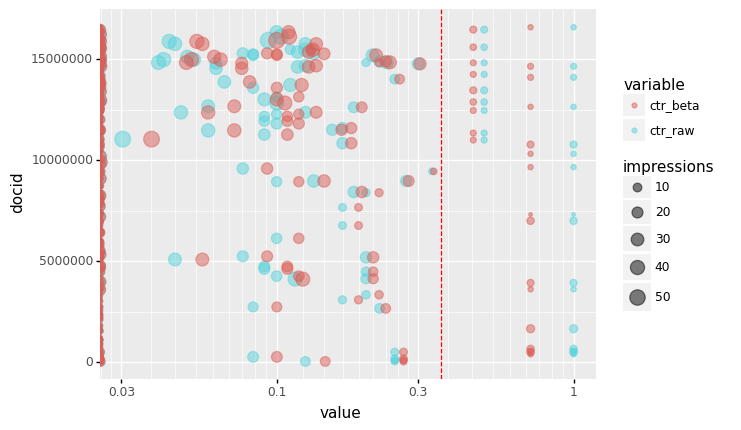

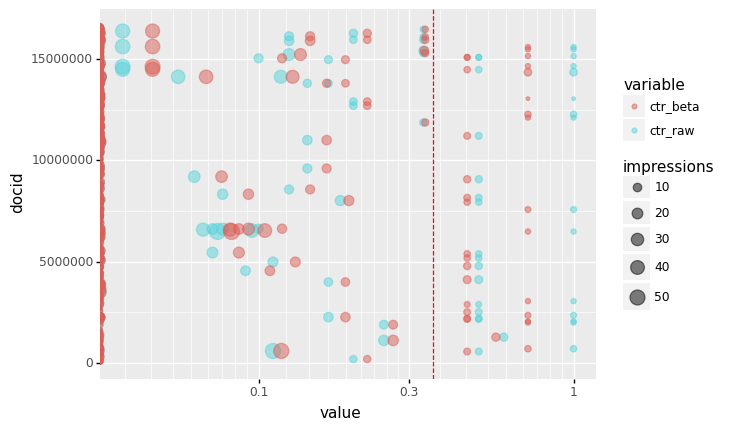

In [6]:
import sys
sys.path.append("../../")
from demo.visualize import draw_dist
from plotnine import *

cnt = 0
for name, group_df in df.groupby(["search_keyword"]):
    if cnt == 10:
        break

    # locally
    # myctr = CTR(df=gdf, impression_column="qc", click_column="cc")
    # gdf = myctr.regularize()

    group_df_selected = group_df[['docid', 'ctr_raw', 'ctr_beta', 'impressions']]
    temp = pd.melt(
        group_df_selected,
        id_vars=['docid', 'impressions'], 
        value_vars=['ctr_raw', 'ctr_beta']
    )
    p = ggplot(temp, aes('value', 'docid', color='variable', size='impressions')) \
            + geom_vline(xintercept = ctr_helper.expected_ctr_beta, linetype='dashed', color="red") \
            + geom_point(alpha = .5) \
            + scale_x_log10()
    p.draw()

    # draw_dist(group_df["ctr_raw"].values.tolist(), title=name)
    # draw_dist(group_df["ctr_beta"].values.tolist())
    # draw_dist(group_df["ctr_gaussian"].values.tolist())
    cnt += 1


## Relevant Score
https://www.microsoft.com/en-us/research/project/mslr/

* 4점: perfectly relevant
* 3점:
* 2점:
* 1점:
* 0점: irrelevant

In [8]:
def get_grade(ctr, ctr_list):
    #print(ctr, np.quantile(ctr_list, 0.95))
    if ctr >= np.quantile(ctr_list, 0.95):
        return 4
    elif ctr >= np.quantile(ctr_list, 0.75):
        return 3
    elif ctr >= np.quantile(ctr_list, 0.50):
        return 2
    elif ctr >= np.quantile(ctr_list, 0.25):
        return 1
    return 0

* 같은 제로클릭이어도, impression이 높은 경우 -> 더 저품질일 가능성
  * 예: uimp=1, uclick=0 vs. uimp=8, uclick=0

In [26]:
target = "ctr_beta"

new_df = None
for i, (query, group_df) in enumerate(df.groupby(["search_keyword"])):
    ctr_list = group_df[group_df["uclicks"] > 1]["ctr_beta"].values.tolist()
    if not ctr_list:
        continue
    # zero click 제외하기
    ctr_cutoff = []
    for perc in [0.95, 0.75, 0.50, 0.25]:
        ctr_cutoff.append(group_df[group_df["uclicks"] > 1]["target"].quantile(perc))

    group_df["grade"] = group_df.apply(lambda row: get_grade(row["target"], ctr_list), axis=1)
    group_df["ctrCutoff"] = ["/".join(f"{x:.1f}" for x in ctr_cutoff)] * len(group_df)
    group_df = group_df.sort_values(["grade"], ascending=False)
    if new_df is None:
        new_df = group_df
    else:
        new_df = pd.concat([new_df, group_df])

# sampling: 각 점수별로 비율을 어느정도 맞춰서?
new_df.insert(0, "ctrCutoff", new_df.pop("ctrCutoff"))
new_df.insert(0, "target", new_df.pop("target"))
new_df.insert(0, "grade", new_df.pop("grade"))
temp = new_df[new_df["search_keyword"] == "#침실인테리어"]
temp[temp["grade"] == 4]

SyntaxError: invalid syntax (3661125845.py, line 14)

## Click Models

\text{SERP Clicks} = f(\text{query, document list, device, user preference, UI/UX, ...})

### mCTR 기반 분위수로 점수 부여해보기
- 평균 대비
- Window (4개) 단위로 mCTR 평균값 및 점수부여
- ...

In [51]:
uqc_mean = df["uqc"].mean()
uqc_50 = df["uqc"].quantile(0.5)
uqc_75 = df["uqc"].quantile(0.75)
uqc_95 = df["uqc"].quantile(0.95)
uqc_99 = df["uqc"].quantile(0.99)

cutoff = uqc_50
def dump_ranking_data():
    """ {grade, query, docid } """
    pass

dump_data = "./ranking/test.txt"
writer = open(dump_data, "w+")

top_k = 50 # FIXME
cnt = 0
queries = set()
for idx, row in df[df.uqc >= cutoff].iterrows():
    # if cnt == 50:
    #     break
    rank2docinfo = {rank:docinfo for rank, docinfo in row["rank2docinfo"].items() if int(rank) <= top_k}
    # ctr_list = [docinfo["ctr"] for rank, docinfo in rank2docinfo.items()]
    # ctr_list = [docinfo["cc"]/(docinfo["qc"]+5) for rank, docinfo in rank2docinfo.items()]
    ctr_list = [docinfo["ucc"]/(docinfo["uqc"]+5) for rank, docinfo in rank2docinfo.items()]

    for rank, docinfo in rank2docinfo.items():
        ctr = docinfo["ucc"]/(docinfo["uqc"]+5)
        relevance = get_relevance_score(ctr, ctr_list)

        if relevance not in (0, 2, 4):
            continue

        writer.write(json.dumps({
            "grade": relevance,
            "query": row["search_keyword"],
            "docid": docinfo["id"],
        }, ensure_ascii=False) + "\n")
        writer.flush()
        queries.add(row["search_keyword"])

    cnt += 1

print(f"Number of data: {len(queries)}")

writer.close()

KeyError: 'rank2docinfo'

## Make Ranking Data

In [ ]:
import sys
sys.path.append("../../")
from myelasticsearch.ltr_wrapper import LTRWrapper
ltr = LTRWrapper()
print(ltr)

In [ ]:

ltr.add_features_to_goldenset()